# Visualización del DataSet: IMDB 5000 Movie

Este notebook se va a estructurar de la siguiente manera:
1. Carga del dataset
2. Visualizaciones interesantes

## 1. Carga del dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import warnings
# warnings.filterwarnings('ignore')

df = pd.read_csv("../data/imdb_5000_movies_limpio.csv")

## 2. Visualizaciones interesantes

### 2.1. Frecuencia de películas por Imdb Score

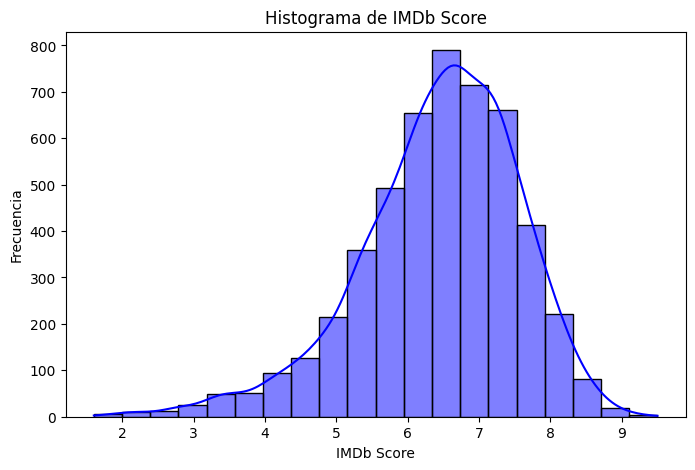

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Imdb Score"], bins=20, kde=True, color="blue")
plt.title("Histograma de IMDb Score")
plt.xlabel("IMDb Score")
plt.ylabel("Frecuencia")
plt.show()

### 2.2. Frecuencia de películas por género

Extraemos los generos para que computen por seperado y no como grupo

In [31]:
generos = df['Genres'].str.split('|').explode().value_counts()

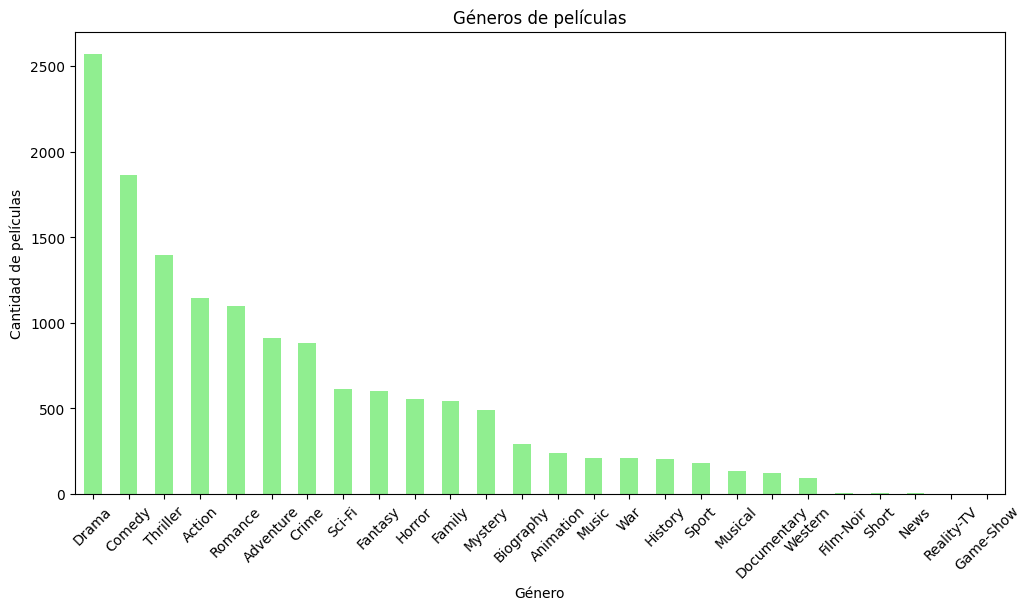

In [32]:
plt.figure(figsize=(12,6))
generos.plot(kind='bar', color='lightgreen')
plt.title('Géneros de películas')
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45)
plt.show()

### 2.3. Evolución del promedio de IMDb Score por género

Obtener generos y filtrar por los más frecuentes para que se pueda entender el gráfico

In [77]:
df_genres = df.assign(Genre=df['Genres'].str.split('|')).explode('Genre')
top_generos = df_genres['Genre'].value_counts().head(5).index

Filtrar el dataset al rango de años deseado

In [89]:
anio_max = df['Title Year'].max()
anio_min = anio_max - 16
df_filtrado = df[df['Title Year'] >= anio_min]

Guardar el promedio por género

In [91]:
promedios = []
for genero in top_generos:
    temp = df[df['Genres'] == genero].groupby('Title Year')['Imdb Score'].mean().reset_index()
    temp['Genres'] = genero
    promedios.append(temp)
promedios_df = pd.concat(promedios, ignore_index=True)

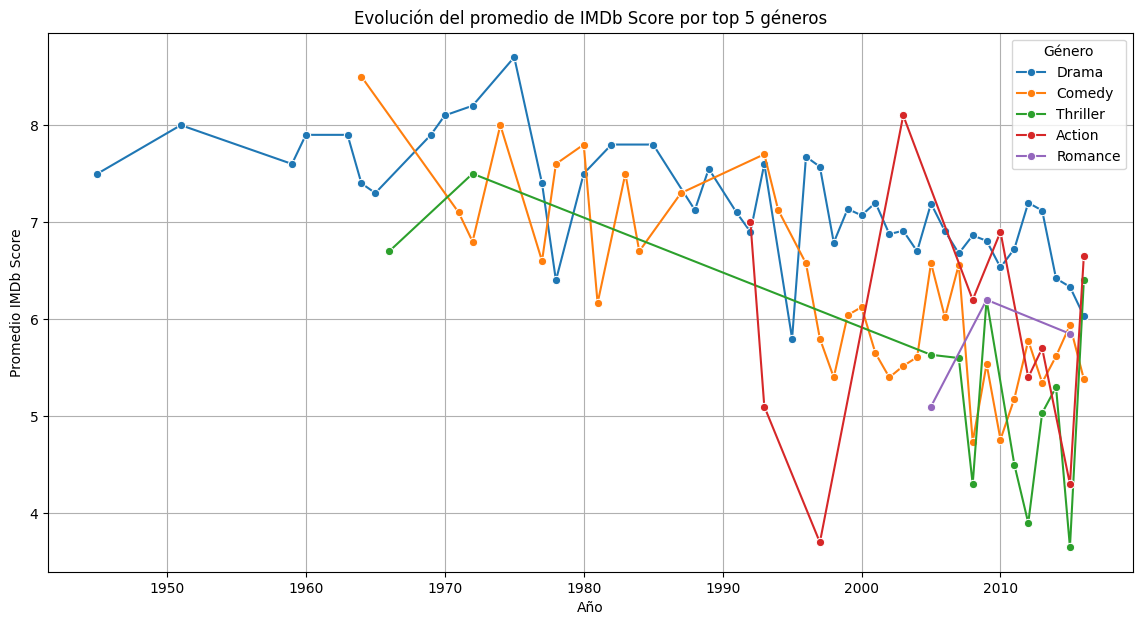

In [94]:
plt.figure(figsize=(14,7))
sns.lineplot(data=promedios_df, x='Title Year', y='Imdb Score', hue='Genres', marker='o')

plt.title(f'Evolución del promedio de IMDb Score por top 5 géneros')
plt.xlabel('Año')
plt.ylabel('Promedio IMDb Score')
plt.legend(title='Género')
plt.grid(True)
plt.show()

### 2.4. Comparativa entre el beneficio medio y el beneficio acumulado del top 5 directores 

¿Quién es el director más rentable?

Se calcula el beneficiio de cada película sabiendo su recuadación y su presupuesto

In [15]:
df["Profit"] = df["Gross"] - df["Budget"]

Se agrupa por director para sumar beneficios de todas sus películas

In [16]:
directores_profit = df.groupby('Director Name')['Profit'].sum()
sum = directores_profit.sort_values(ascending=False).head(5)
directores_profit = df.groupby('Director Name')['Profit'].mean()
mean = directores_profit.sort_values(ascending=False).head(5)
# sum_mean = pd.concat([sum, mean])

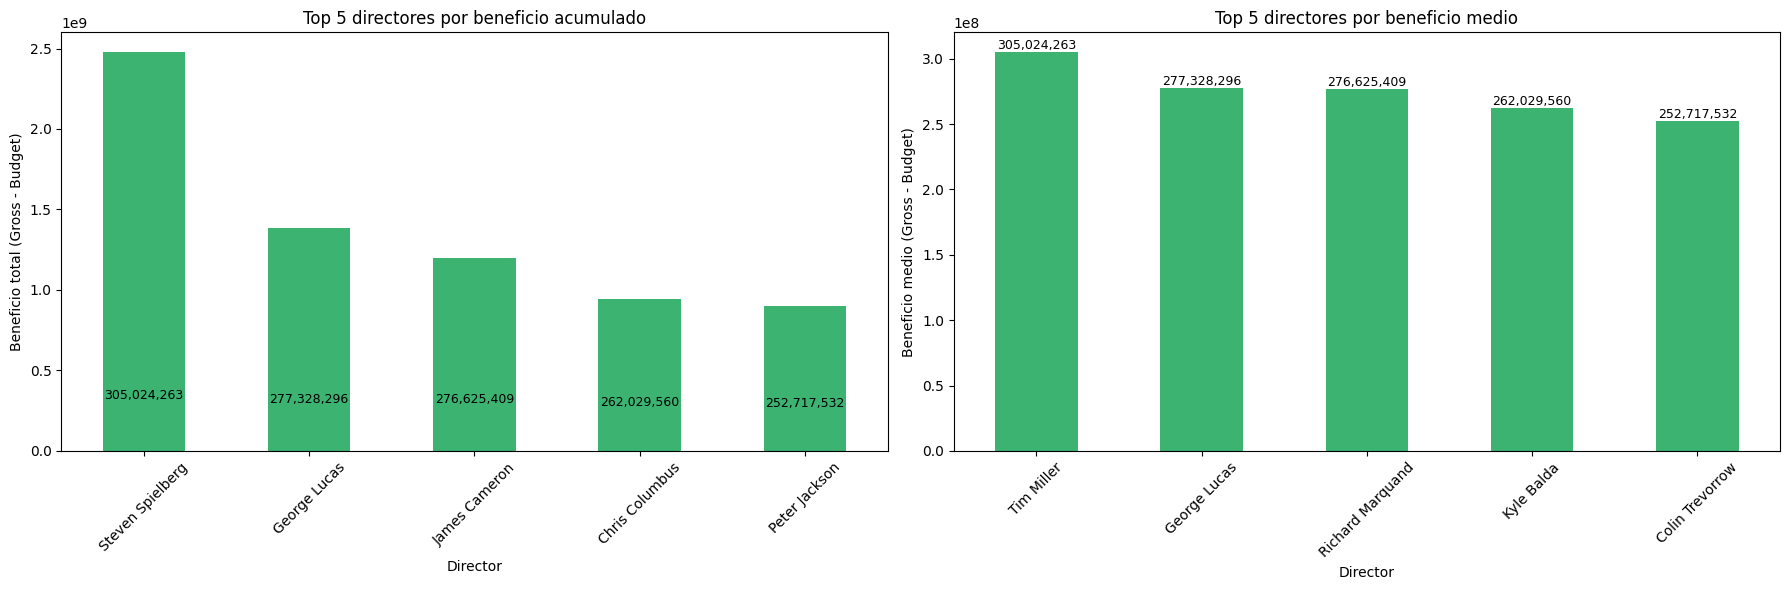

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))   # 1 fila, 2 columnas

# --- SUBGRAFICO 1: Beneficio total ---
sum.plot(kind='bar', color='mediumseagreen', ax=axes[0])
axes[0].set_title('Top 5 directores por beneficio acumulado')
axes[0].set_xlabel('Director')
axes[0].set_ylabel('Beneficio total (Gross - Budget)')
axes[0].tick_params(axis='x', rotation=45)


# --- SUBGRAFICO 2: Beneficio medio ---
mean.plot(kind='bar', color='mediumseagreen', ax=axes[1])
axes[1].set_title('Top 5 directores por beneficio medio')
axes[1].set_xlabel('Director')
axes[1].set_ylabel('Beneficio medio (Gross - Budget)')
axes[1].tick_params(axis='x', rotation=45)

# Etiquetas
for i, value in enumerate(mean):
    axes[0].text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=9)
    axes[1].text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()